In [11]:
!pip install pivottablejs

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from pivottablejs import pivot_ui
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [51]:
def codificacion_variable(df,lista_valores,codigo_valores,nombre_columna,nueva_columna):
    """
    df: 
    
    lista_valores: list
        valores que se desean recodificar
    codigo_valores: list
        codificación nueva asociada al orden de la variable lista_valores
    nombre_columna: String 
        nombre de la columna donde estan los valores
    nueva_columna: String
        nombre de la nueva columna con la codificación
    """
    
    for i in range(len(lista_valores)):
        df.loc[df[nombre_columna]==lista_valores[i],nueva_columna] = codigo_valores.get(lista_valores[i])


In [57]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [59]:
datasets = pd.read_csv(r"movies.csv")
datasets.dropna()
datasets = datasets[datasets.budget != 0].reset_index(drop=True)
datasets.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [60]:
directores = datasets['director'].unique().tolist()
codigo_directores = {}

for i in range(len(directores)):
    codigo_directores[directores[i]] = i + 1


In [61]:
codificacion_variable(datasets,directores,codigo_directores,"director","codigo_director")
datasets.to_csv('Peliculas.csv')
datasets.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,codigo_director
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.0
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.0
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,3.0
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,4.0
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,5.0


In [62]:
#datasets.describe()
pivot_ui(datasets,rows=['director','codigo_director'], cols=['runtime'])

In [42]:
#sb.pairplot(datasets)
#sb.pairplot(datasets, hue='revenue',size=4,vars=["runtime","popularity"],kind='scatter')

In [63]:
X = np.array(datasets[["runtime","popularity"]])
y = np.array(datasets['revenue'])
X.shape

(5170, 2)

In [64]:
valor_final = 20

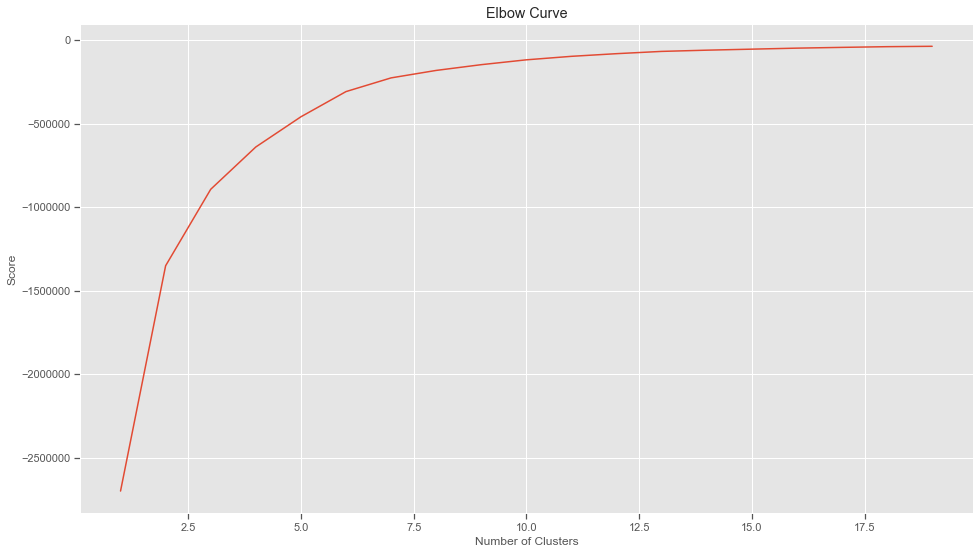

In [65]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i, init = 'k-means++', random_state = 42) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [66]:
kmeans = KMeans(n_clusters=5,init = 'k-means++', random_state = 42).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[104.33165369   0.92857762]
 [126.74228524   1.36683838]
 [168.62886598   1.87374653]
 [ 87.54030227   0.69122252]
 [370.66666667   0.53655133]]


In [67]:
# Predicting the clusters
y_kmeans = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in y_kmeans:
    asignar.append(colores[row])


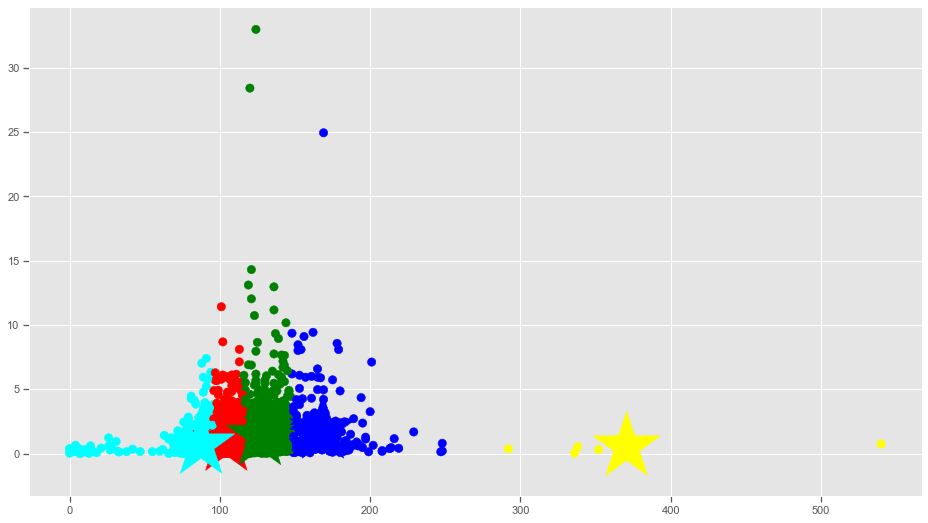

In [68]:

# Getting the values and plotting it
f1 = datasets['runtime'].values
f2 = datasets['popularity'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=5000)
plt.show()
